In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
import random
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
df = pd.read_csv('RawDataset.csv')
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14.0,20.0,No,11.0,Mild Pain,Low,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15.0,8.0,Yes,15.0,Ubearable Pain,High,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,43.0,18.0,Yes,14.0,Mild Pain,Low,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16.0,12.0,Yes,15.0,Strong Pain,High,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16.0,28.0,No,7.0,Mild Pain,High,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [3]:
df.dtypes

anxiety_level                   float64
self_esteem                     float64
mental_health_history            object
depression                      float64
headache                         object
blood_pressure                   object
sleep_quality                     int64
breathing_problem                 int64
noise_level                       int64
living_conditions                 int64
safety                            int64
basic_needs                       int64
academic_performance              int64
study_load                        int64
teacher_student_relationship      int64
future_career_concerns            int64
social_support                    int64
peer_pressure                     int64
extracurricular_activities        int64
bullying                          int64
stress_level                      int64
dtype: object

In [4]:
df.describe()

,anxiety_level,self_esteem,depression,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1060.000000,1060.000000,1067.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,12.500000,19.539623,14.116214,2.660000,2.753636,2.649091,2.518182,2.737273,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,8.989502,11.673207,10.026774,1.548383,1.400713,1.328127,1.119208,1.406171,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,7.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,12.000000,20.000000,12.000000,2.500000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,17.000000,26.000000,20.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,50.000000,59.000000,49.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


## Class Distribution to find Imbalances in classes of target variable

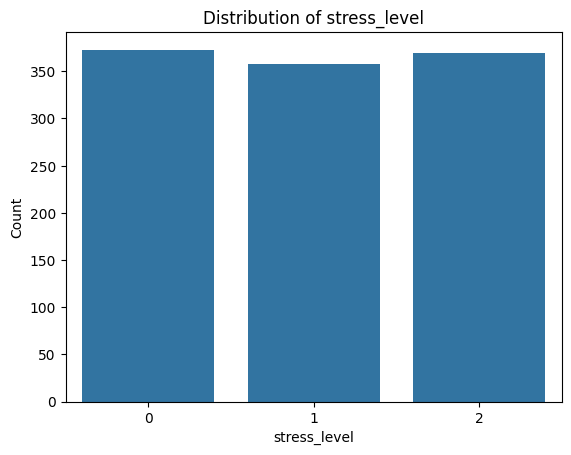

In [5]:
target_variable = "stress_level"
sns.countplot(data=df, x=target_variable)

# Add Labels
plt.xlabel(target_variable)
plt.ylabel('Count')
plt.title(f'Distribution of {target_variable}')

plt.savefig("class_distribution.png")
plt.show()

### Observations: As all the classes have approximately equal number of counts there is no imbalances in the dataset

## Handling Outliers in anxiety_level

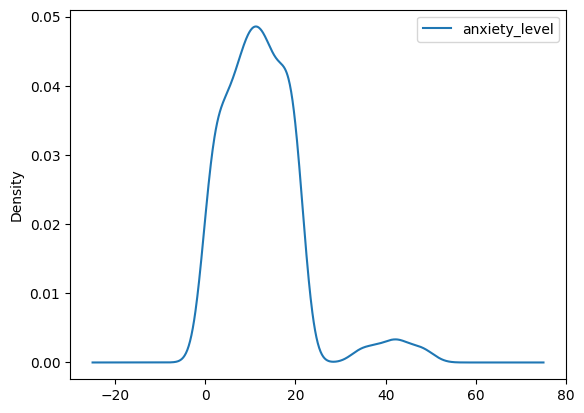

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['anxiety_level'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<Axes: >

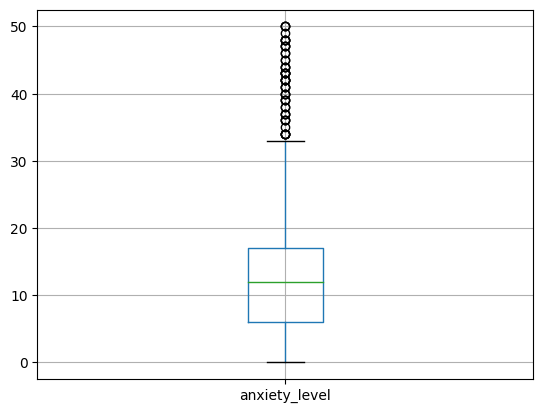

In [7]:
df.boxplot(column="anxiety_level")

<Axes: >

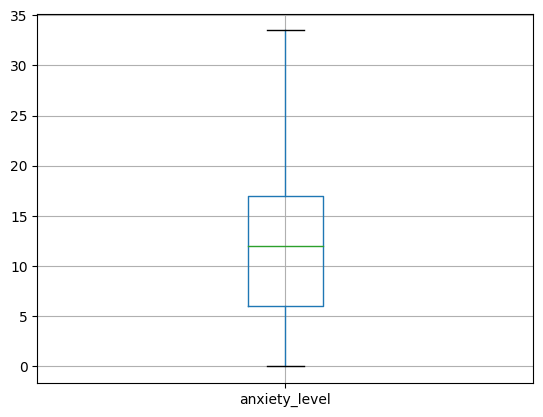

In [8]:
IQR = df.anxiety_level.quantile(0.75) - df.anxiety_level.quantile(0.25)

lower_bridge = df['anxiety_level'].quantile(0.25) - (IQR * 1.5)
upper_bridge = df['anxiety_level'].quantile(0.75) + (IQR * 1.5)

df.loc[df['anxiety_level'] >= 33.5, 'anxiety_level'] = 33.5
df.boxplot(column="anxiety_level")

## Handling Outliers in self_esteem

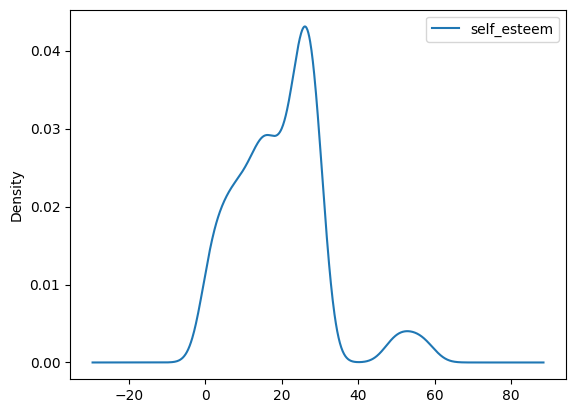

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['self_esteem'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<Axes: >

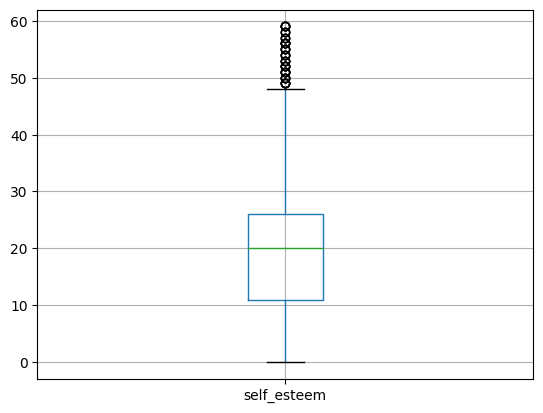

In [10]:
df.boxplot(column="self_esteem")

<Axes: >

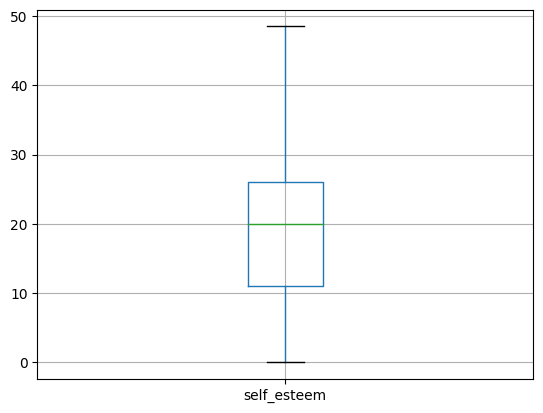

In [11]:
IQR = df.self_esteem.quantile(0.75) - df.self_esteem.quantile(0.25)

lower_bridge = df['self_esteem'].quantile(0.25) - (IQR * 1.5)
upper_bridge = df['self_esteem'].quantile(0.75) + (IQR * 1.5)
df.loc[df['self_esteem'] >= 48.5, 'self_esteem'] = 48.5
df.boxplot(column="self_esteem")

## Handling Outliers in depression

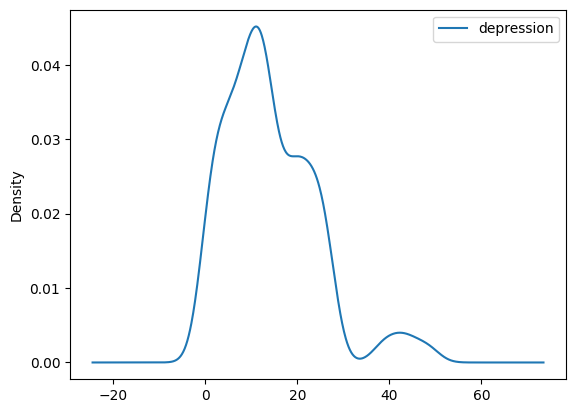

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['depression'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<Axes: >

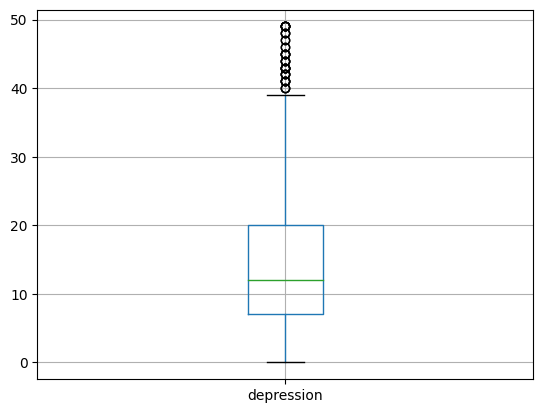

In [13]:
df.boxplot(column="depression")

<Axes: >

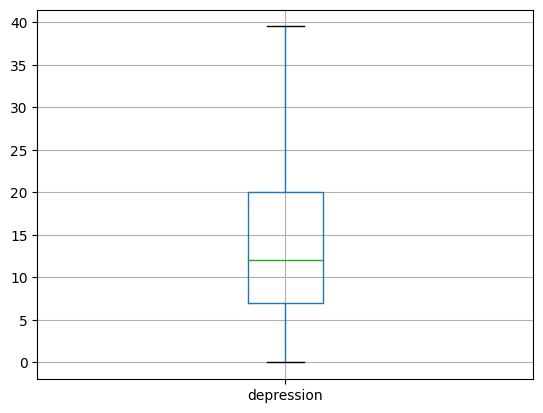

In [14]:
IQR = df.depression.quantile(0.75) - df.depression.quantile(0.25)

lower_bridge = df['depression'].quantile(0.25) - (IQR * 1.5)
upper_bridge = df['depression'].quantile(0.75) + (IQR * 1.5)

df.loc[df['depression'] >= 39.5, 'depression'] = 39.5
df.boxplot(column="depression")

# Identifying and Handling Missing Values

In [15]:
df.shape  #(rows, columns)
df.isnull().sum() 

anxiety_level                   40
self_esteem                     40
mental_health_history            0
depression                      33
headache                         0
blood_pressure                   0
sleep_quality                    0
breathing_problem                0
noise_level                      0
living_conditions                0
safety                           0
basic_needs                      0
academic_performance             0
study_load                       0
teacher_student_relationship     0
future_career_concerns           0
social_support                   0
peer_pressure                    0
extracurricular_activities       0
bullying                         0
stress_level                     0
dtype: int64

In [16]:
# for self_esteem column
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(df[['self_esteem']])
df['self_esteem'] = impute.transform(df[['self_esteem']])
df.isnull().sum()

anxiety_level                   40
self_esteem                      0
mental_health_history            0
depression                      33
headache                         0
blood_pressure                   0
sleep_quality                    0
breathing_problem                0
noise_level                      0
living_conditions                0
safety                           0
basic_needs                      0
academic_performance             0
study_load                       0
teacher_student_relationship     0
future_career_concerns           0
social_support                   0
peer_pressure                    0
extracurricular_activities       0
bullying                         0
stress_level                     0
dtype: int64

In [17]:
# for anxiety_level column
impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
impute.fit(df[['anxiety_level']])
df['anxiety_level'] = impute.transform(df[['anxiety_level']])
df.isnull().sum()

anxiety_level                    0
self_esteem                      0
mental_health_history            0
depression                      33
headache                         0
blood_pressure                   0
sleep_quality                    0
breathing_problem                0
noise_level                      0
living_conditions                0
safety                           0
basic_needs                      0
academic_performance             0
study_load                       0
teacher_student_relationship     0
future_career_concerns           0
social_support                   0
peer_pressure                    0
extracurricular_activities       0
bullying                         0
stress_level                     0
dtype: int64

In [18]:
# for depression column
df.shape
df = df.dropna(axis=0, subset=['depression'])
df.shape
df

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14.0,20.0,No,11.0,Mild Pain,Low,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15.0,8.0,Yes,15.0,Ubearable Pain,High,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,33.5,18.0,Yes,14.0,Mild Pain,Low,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16.0,12.0,Yes,15.0,Strong Pain,High,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16.0,28.0,No,7.0,Mild Pain,High,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11.0,17.0,No,14.0,Mediocre Pain,Low,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9.0,12.0,No,8.0,No Pain,High,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4.0,26.0,No,3.0,Less Pain,Medium,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21.0,0.0,Yes,19.0,Ubearable Pain,High,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


# Encoding Categorical vlaues

In [19]:
# Binary encoding of mental health history 
df['mental_health_history'].unique()
df['mental_health_history'] = df['mental_health_history'].map({'No': 0, 'Yes': 1})
df

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14.0,20.0,0,11.0,Mild Pain,Low,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15.0,8.0,1,15.0,Ubearable Pain,High,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,33.5,18.0,1,14.0,Mild Pain,Low,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16.0,12.0,1,15.0,Strong Pain,High,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16.0,28.0,0,7.0,Mild Pain,High,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11.0,17.0,0,14.0,Mediocre Pain,Low,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9.0,12.0,0,8.0,No Pain,High,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4.0,26.0,0,3.0,Less Pain,Medium,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21.0,0.0,1,19.0,Ubearable Pain,High,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


In [20]:
# Label Encoding of blood pressure 
df['blood_pressure'].unique()
df['blood_pressure'] = df['blood_pressure'].map({'Low': 0, 'Medium': 1, 'High': 2})
df

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14.0,20.0,0,11.0,Mild Pain,0,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15.0,8.0,1,15.0,Ubearable Pain,2,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,33.5,18.0,1,14.0,Mild Pain,0,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16.0,12.0,1,15.0,Strong Pain,2,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16.0,28.0,0,7.0,Mild Pain,2,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11.0,17.0,0,14.0,Mediocre Pain,0,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9.0,12.0,0,8.0,No Pain,2,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4.0,26.0,0,3.0,Less Pain,1,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21.0,0.0,1,19.0,Ubearable Pain,2,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


In [21]:
# Label Encoding for Headache
df['headache'].unique()

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the encoder on the DataFrame
df['headache'] = label_encoder.fit_transform(df['headache'])
df

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14.0,20.0,0,11.0,2,0,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15.0,8.0,1,15.0,5,2,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,33.5,18.0,1,14.0,2,0,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16.0,12.0,1,15.0,4,2,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16.0,28.0,0,7.0,2,2,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11.0,17.0,0,14.0,1,0,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9.0,12.0,0,8.0,3,2,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4.0,26.0,0,3.0,0,1,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21.0,0.0,1,19.0,5,2,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


## Feature Selection

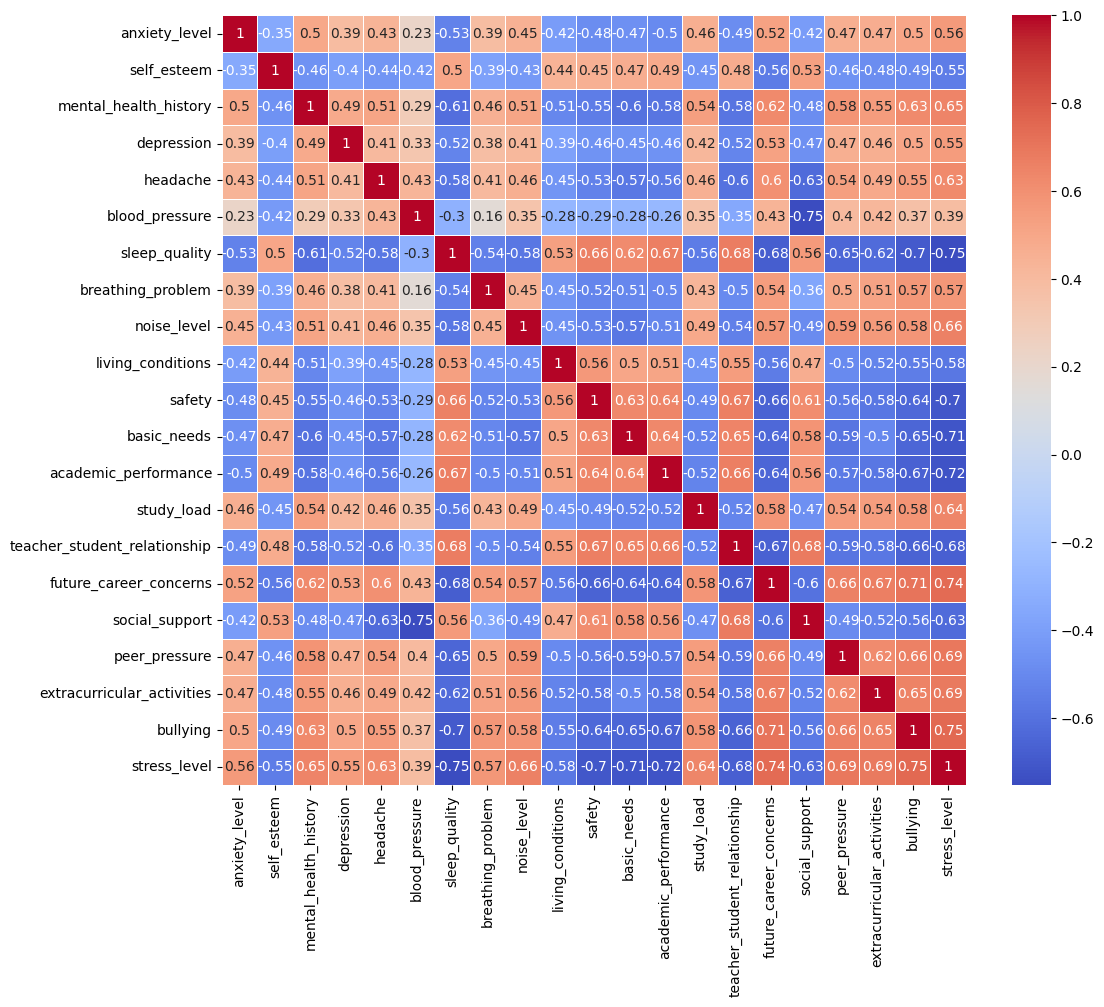

In [22]:
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Show the plot
plt.savefig("heatmap.png")
plt.show()

In [23]:
X = df.iloc[:,:-1]
y = df['stress_level']

# Select 15 features with the best chi square score
best_features = SelectKBest(score_func=chi2, k=15)
ordered_feature = best_features.fit(X, y)

# Scores and respective features
dfscores = pd.DataFrame(ordered_feature.scores_, columns=["Score"])
dfcolumns = pd.DataFrame(X.columns)

features_rank = pd.concat([dfcolumns, dfscores], axis=1)
features_rank.columns = ['Features', 'Score']
features_rank

,Features,Score
0,anxiety_level,1577.329882
1,self_esteem,2007.377794
2,mental_health_history,229.160626
3,depression,2093.135178
4,headache,716.728439
5,blood_pressure,412.825110
6,sleep_quality,545.436144
7,breathing_problem,254.501637
8,noise_level,317.348636
9,living_conditions,175.992548


## Seeing if Feature Scaling is required

In [24]:
feature_scales = df.describe().loc[['min', 'max']].transpose()

print("Feature Scales:")
print(feature_scales)
df.head()

Feature Scales:
                              min   max
anxiety_level                 0.0  33.5
self_esteem                   0.0  48.5
mental_health_history         0.0   1.0
depression                    0.0  39.5
headache                      0.0   5.0
blood_pressure                0.0   2.0
sleep_quality                 0.0   5.0
breathing_problem             0.0   5.0
noise_level                   0.0   5.0
living_conditions             0.0   5.0
safety                        0.0   5.0
basic_needs                   0.0   5.0
academic_performance          0.0   5.0
study_load                    0.0   5.0
teacher_student_relationship  0.0   5.0
future_career_concerns        0.0   5.0
social_support                0.0   3.0
peer_pressure                 0.0   5.0
extracurricular_activities    0.0   5.0
bullying                      0.0   5.0
stress_level                  0.0   2.0


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14.0,20.0,0,11.0,2,0,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15.0,8.0,1,15.0,5,2,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,33.5,18.0,1,14.0,2,0,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16.0,12.0,1,15.0,4,2,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16.0,28.0,0,7.0,2,2,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


# Train Test Split


In [25]:
# seperating data and labels 
X = df.drop(columns='stress_level', axis = 1)
Y = df['stress_level']

In [26]:
# train test split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)
print(X.shape, X_train.shape, X_test.shape)

(1067, 20) (853, 20) (214, 20)


## Feature scaling

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/var/folders/n1/j4qhhn297tj4tnrpbsvg4q800000gn/T/ipykernel_2496/3170309886.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

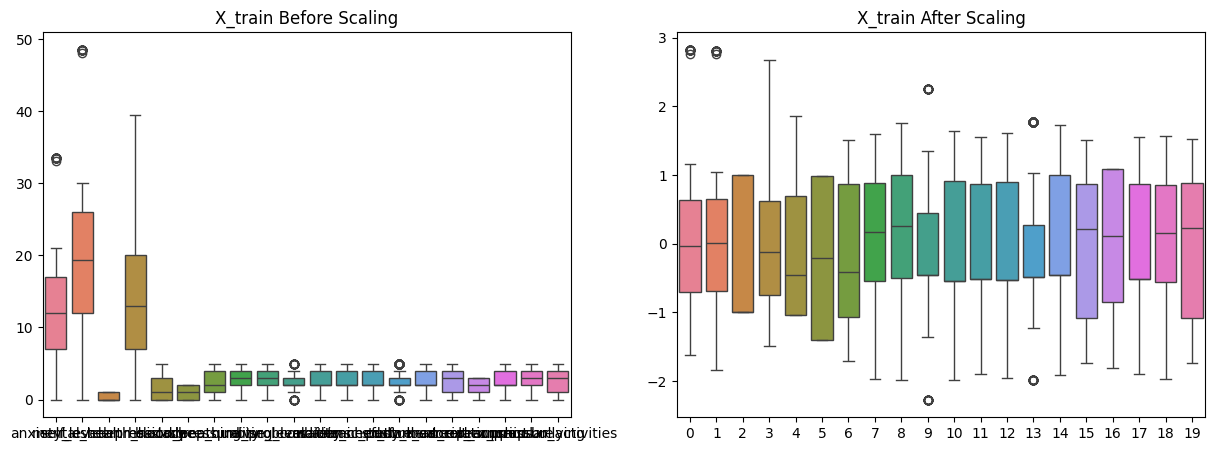

In [28]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.savefig("scaling.png")
plt.title('X_train After Scaling')

### Using Grid Search CV to perform cross validation on training data and finding the best parameter and evaluating the model with the best parameter

In [29]:
def find_best_params(model, params, X_train, y_train, cv=10):
    grid_search = GridSearchCV(model, params, cv=cv, scoring='accuracy')

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)
    
    # Get the best hyperparameters
    best_params = grid_search.best_params_
    return best_params

# Random Forest Classifier

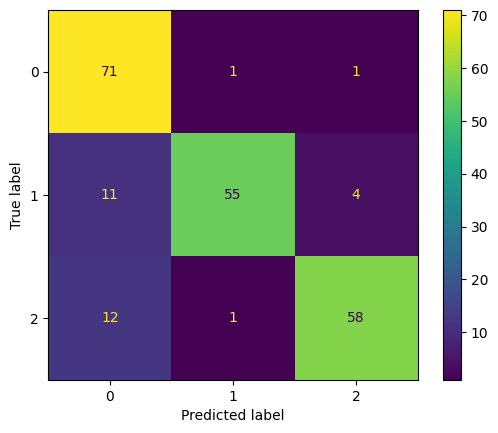

              precision    recall  f1-score   support

           0       0.97      0.76      0.85        94
           1       0.79      0.96      0.87        57
           2       0.82      0.92      0.87        63

    accuracy                           0.86       214
   macro avg       0.86      0.88      0.86       214
weighted avg       0.88      0.86      0.86       214



In [30]:
random_forest = RandomForestClassifier()
params = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10] 
}

best_params = find_best_params(random_forest, params, X_train_scaled, Y_train)

# Train the final model with the best hyperparameters on the entire training set
final_model = RandomForestClassifier(**best_params)
final_model.fit(X_train_scaled, Y_train)

# Classification Report
y_pred = final_model.predict(X_test_scaled)
cm_matrix= confusion_matrix(Y_test,y_pred)
cm_display= ConfusionMatrixDisplay(confusion_matrix= cm_matrix, display_labels=[0,1,2])
cm_display.plot()
plt.show()
print(classification_report(y_pred, Y_test))

# Evaluate the final model on the test set
RF_test_accuracy = final_model.score(X_test_scaled, Y_test)

# Support Vector Machine

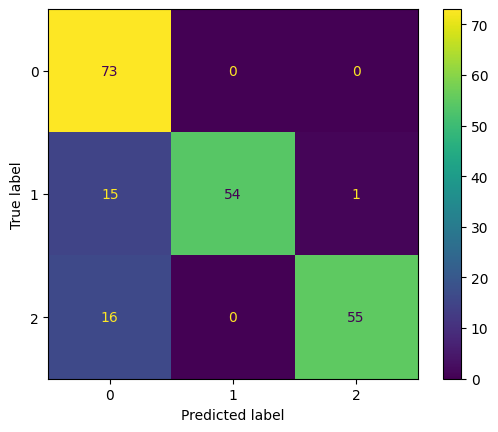

              precision    recall  f1-score   support

           0       1.00      0.70      0.82       104
           1       0.77      1.00      0.87        54
           2       0.77      0.98      0.87        56

    accuracy                           0.85       214
   macro avg       0.85      0.89      0.85       214
weighted avg       0.88      0.85      0.85       214



In [31]:
svm_model = SVC()

# Define the hyperparameter grid
param = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

best_params = find_best_params(svm_model, param, X_train_scaled, Y_train)

# Train the final model with the best hyperparameters on the entire training set
final_model = SVC(**best_params)
final_model.fit(X_train_scaled, Y_train)

# Classification Report
y_pred= final_model.predict(X_test_scaled)
cm_matrix= confusion_matrix(Y_test,y_pred)
cm_display= ConfusionMatrixDisplay(confusion_matrix= cm_matrix, display_labels=[0,1,2])
cm_display.plot()
plt.show()
print(classification_report(y_pred, Y_test))

# Evaluate the final model on the test set
SVM_test_accuracy = final_model.score(X_test_scaled, Y_test)

# Decision Tree Classifier

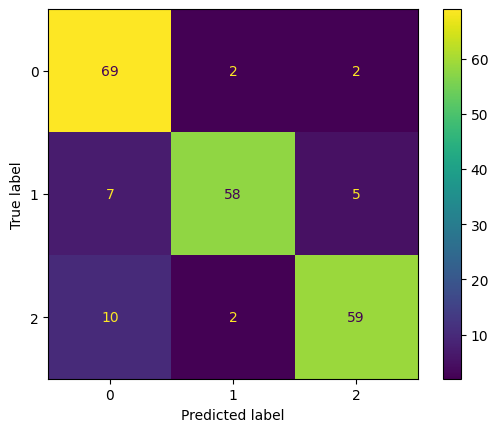

              precision    recall  f1-score   support

           0       0.95      0.80      0.87        86
           1       0.83      0.94      0.88        62
           2       0.83      0.89      0.86        66

    accuracy                           0.87       214
   macro avg       0.87      0.88      0.87       214
weighted avg       0.88      0.87      0.87       214



In [32]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, criterion='entropy')

# training the model 
clf = clf.fit(X_train_scaled, Y_train)

# Classification Report
y_pred= clf.predict(X_test_scaled)
cm_matrix= confusion_matrix(Y_test,y_pred)
cm_display= ConfusionMatrixDisplay(confusion_matrix= cm_matrix, display_labels=[0,1,2])
cm_display.plot()
plt.show()
print(classification_report(y_pred, Y_test))

# evaluating the test_accuracy on the test set
DT_test_accuracy = clf.score(X_test_scaled, Y_test)

## Comparision of accuracies

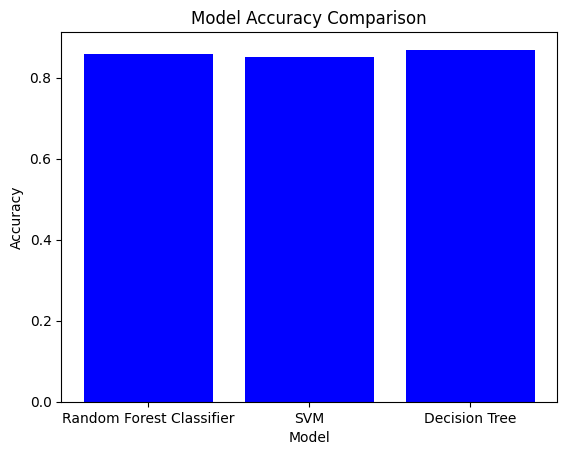

In [33]:
models = ['Random Forest Classifier', 'SVM', 'Decision Tree']
accuracies = [RF_test_accuracy, SVM_test_accuracy, DT_test_accuracy]

# Create a bar chart
plt.bar(models, accuracies, color='blue')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Display the bar chart
plt.show()